In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import re

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

from sklearn.model_selection import train_test_split

import xgboost as xgb

import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential

from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

import warnings
warnings.filterwarnings('ignore')


In [13]:
df=pd.read_csv("/SolarPrediction.csv")


In [14]:
df['Data']=df['Data'].apply(lambda x: x.split()[0])

In [15]:
df['Month']=pd.to_datetime(df['Data']).dt.month
df['Day']=pd.to_datetime(df['Data']).dt.day
df['Year']=pd.to_datetime(df['Data']).dt.year
df['Hour']=pd.to_datetime(df['Time']).dt.hour
df['Minute']=pd.to_datetime(df['Time']).dt.minute
df['Second']=pd.to_datetime(df['Time']).dt.second

In [16]:
df['SunriseHour'] = df['TimeSunRise'].astype(str).apply(lambda x: re.search(r'^\d+', x).group(0) if re.search(r'^\d+', x) else np.nan).astype(float).fillna(0).astype(int)
df['SunriseMinute'] = df['TimeSunRise'].astype(str).apply(lambda x: re.search(r':(\d+)', x).group(1) if re.search(r':(\d+)', x) else np.nan).astype(float).fillna(0).astype(int)
df['SunsetHour'] = df['TimeSunSet'].astype(str).apply(lambda x: re.search(r':(\d+)', x).group(1) if re.search(r':(\d+)', x) else np.nan).astype(float).fillna(0).astype(int)
df['SunsetMinute'] = df['TimeSunSet'].astype(str).apply(lambda x: re.search(r':(\d+)', x).group(1) if re.search(r':(\d+)', x) else np.nan).astype(float).fillna(0).astype(int)

In [17]:
df.drop(['UNIXTime','Data','Time','TimeSunRise','TimeSunSet'],axis=1,inplace=True)

In [18]:
df.isnull().sum().sum()

np.int64(0)

In [19]:
input_features=df.drop(['Radiation'],axis=1)
output_features=df['Radiation']

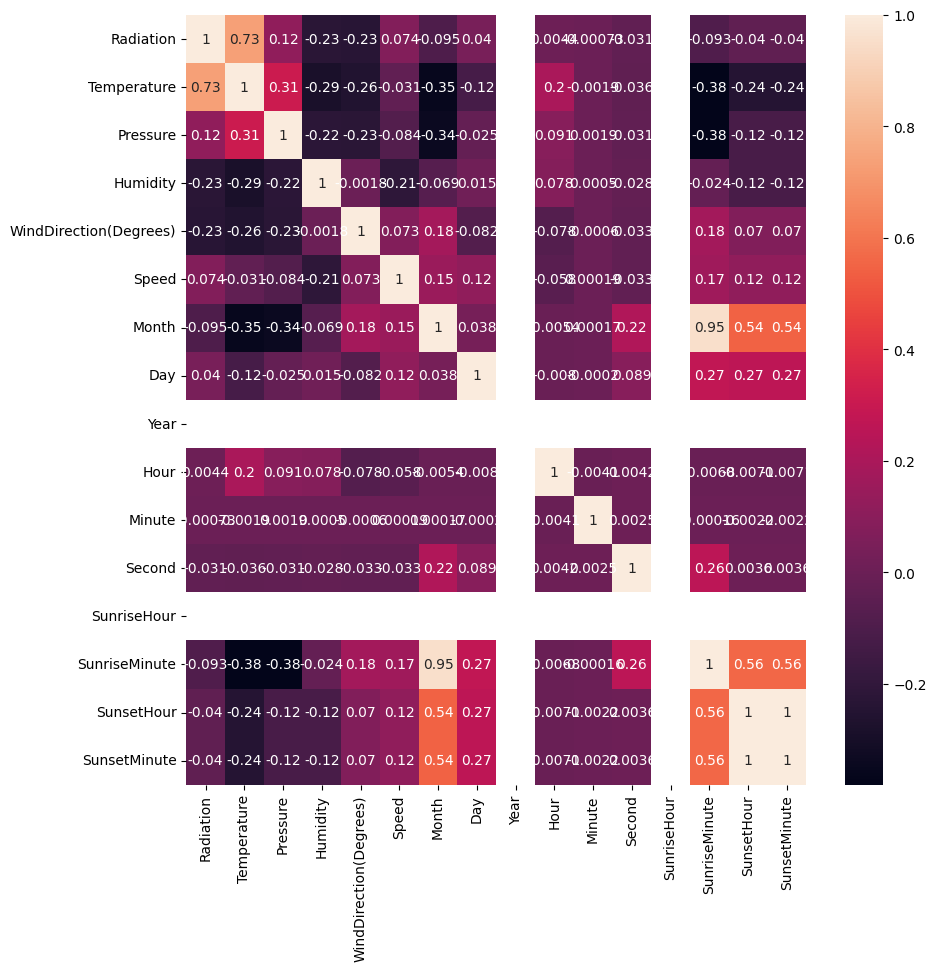

In [20]:
cor=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True)
plt.show()

In [21]:
del df

In [22]:
output_features = output_features.fillna(0).apply(lambda x: int(x * 100))

In [23]:
scalar=MinMaxScaler()
scaled_input_features=scalar.fit_transform(input_features)
input_features_columns=input_features.columns

In [24]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Assuming scaled_input_features and output_features are defined

# Create an imputer to replace NaN with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your data and transform it
scaled_input_features_imputed = imputer.fit_transform(scaled_input_features)

# Now use the imputed data for feature selection
feature_selector = SelectKBest(chi2, k='all')
selected_features = feature_selector.fit(scaled_input_features_imputed, output_features)

In [25]:
imp=pd.DataFrame(selected_features.scores_,index=input_features_columns,columns=['Importance'])
imp.sort_values(by='Importance',ascending=False, inplace=True)
imp

Importance
Month                   4684.579610
SunriseMinute           4015.062771
WindDirection(Degrees)  3271.827277
Day                     2841.926850
Minute                  2702.449333
Second                  2288.673032
SunsetHour              1863.712087
SunsetMinute            1863.712087
Temperature             1651.685632
Humidity                1588.087433
Speed                    765.859779
Hour                     691.185393
Pressure                 523.791060
Year                            NaN
SunriseHour                     NaN

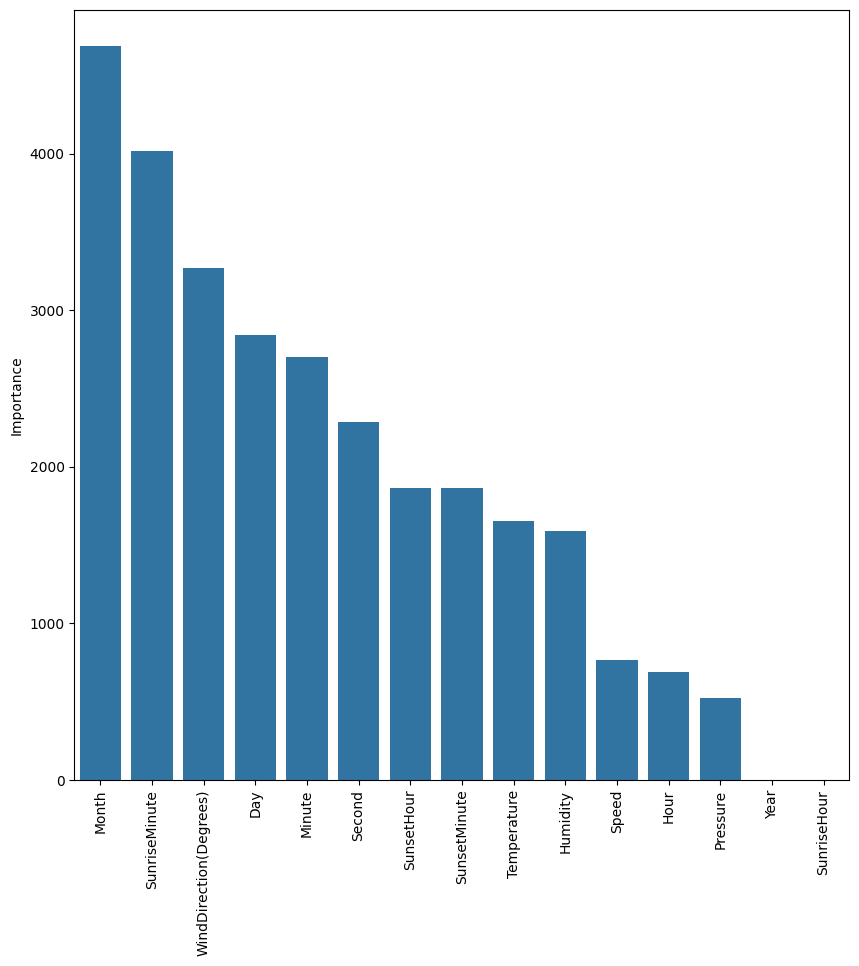

In [26]:
plt.figure(figsize=(10,10))
sns.barplot(imp.Importance)
plt.xticks(rotation=90)
plt.show()

In [27]:
# Ensure MinMaxScaler is imported
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Now you can use MinMaxScaler
scalar=MinMaxScaler()
scaled_input_features=scalar.fit_transform(input_features)
input_features_columns=input_features.columns

In [30]:
# Previous cells...
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor # Import the XGBRegressor

# Reload the dataframe if it's been deleted (assuming it's from "SolarPrediction.csv")
df = pd.read_csv("/SolarPrediction.csv")

# Perform data preprocessing steps from previous cells (e.g., extracting month, day, etc.)

# Drop the problematic columns from the DataFrame
df.drop(['Data', 'Time', 'TimeSunRise', 'TimeSunSet'], axis=1, inplace=True)

# Define input_features and output_features
input_features = df.drop(['Radiation'], axis=1)
output_features = df['Radiation']

# Ensure input_features and output_features are defined

# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(input_features, output_features, test_size=0.3)  # Adjust test_size as needed

# Now fit the model
model = XGBRegressor() # Create an instance of the XGBRegressor model
model.fit(xTrain, yTrain)  # Fit the model to your training data

# Now you can access feature importances
imp = pd.DataFrame(model.feature_importances_, index=input_features.columns, columns=['Importance'])  # Use input_features.columns here
imp.sort_values(by='Importance', ascending=False, inplace=True)
imp

Importance
Temperature               0.682432
UNIXTime                  0.113522
Humidity                  0.077194
Pressure                  0.046841
WindDirection(Degrees)    0.040579
Speed                     0.039432

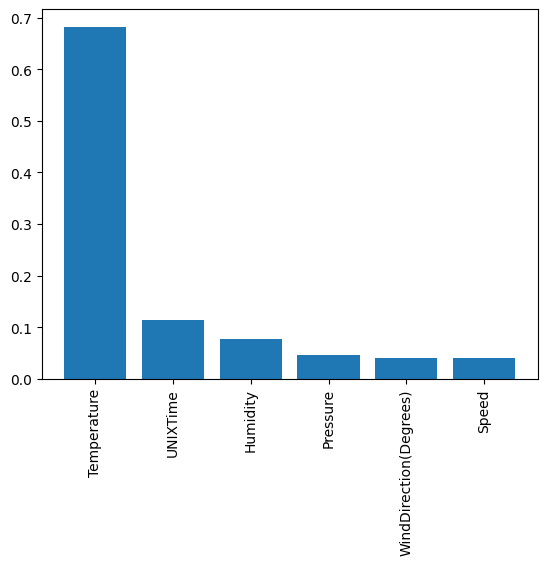

In [31]:
import matplotlib.pyplot as plt # This line imports matplotlib.pyplot and assigns it to the alias 'plt'

plt.bar(imp.index,imp['Importance'])
plt.xticks(rotation=90)
plt.show()

feature Engineering

In [56]:
# Drop the columns from the original dataframe before creating input_features
df = pd.read_csv("/SolarPrediction.csv")  # Assuming you reloaded the DataFrame

# ... (Your other preprocessing steps to extract month, day, etc.)

# Drop only the columns that exist in the original DataFrame
df.drop(['Data', 'Time', 'TimeSunRise', 'TimeSunSet'], axis=1, inplace=True)  # Remove 'Year', 'SunriseHour'

# Now define input_features
input_features = df.drop(['Radiation'], axis=1)
output_features = df['Radiation']

# ... (Rest of your code)

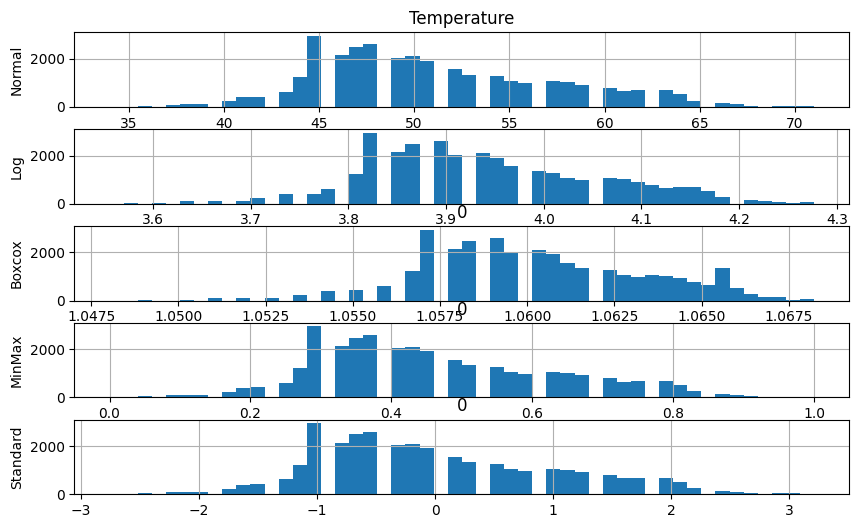

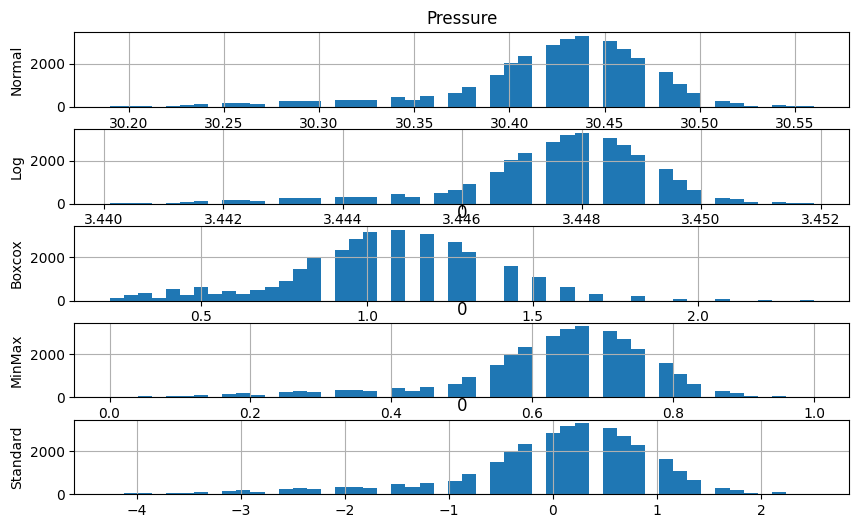

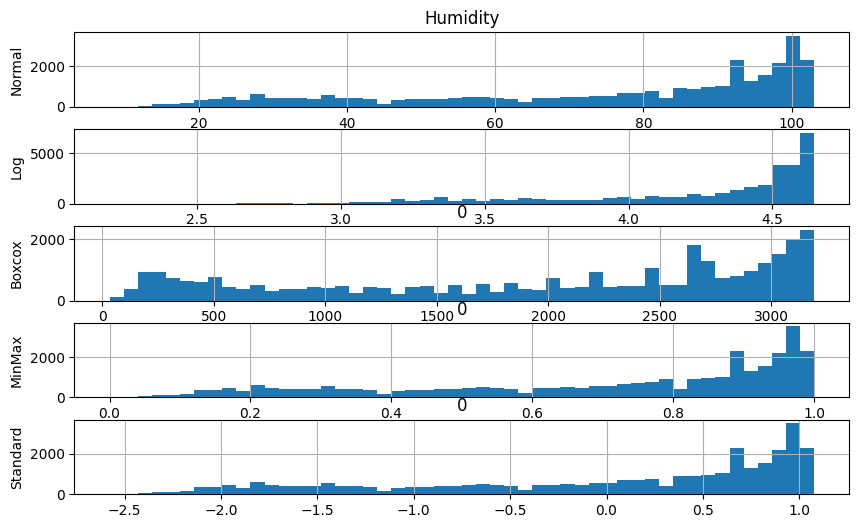

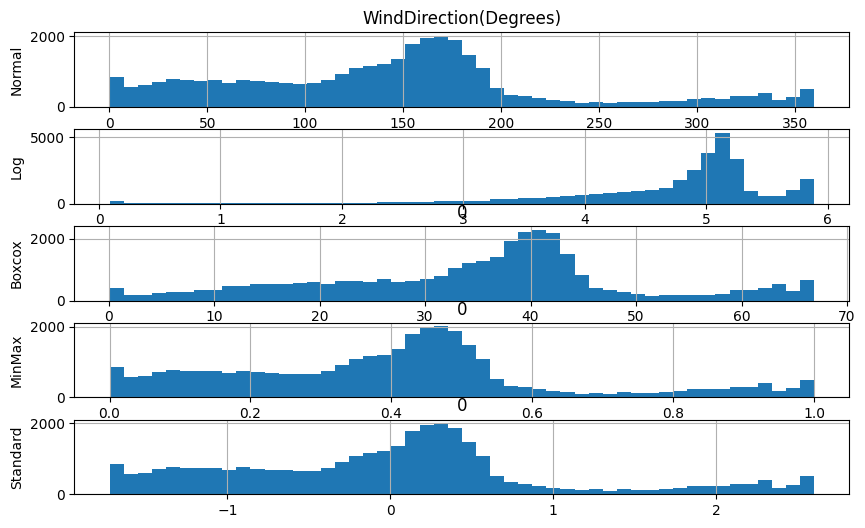

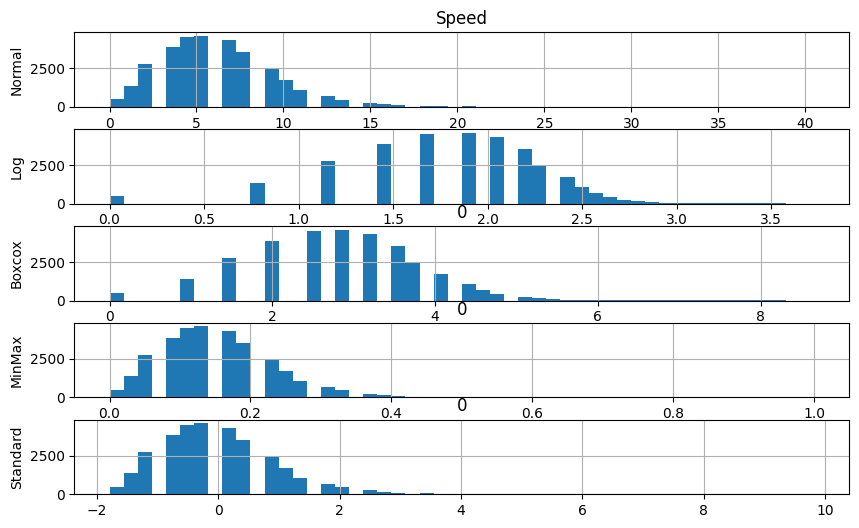

In [57]:
import numpy as np # Import numpy for numerical computations
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

transform_features=['Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed']
for i in transform_features:
    fig, (ax1,ax2,ax3,ax4,ax5)= plt.subplots(5,1, figsize=(10,6))
    input_features[i].hist(ax=ax1, bins=50)
    ((input_features[i]+1).transform(np.log)).hist(ax=ax2, bins=50) # Now np.log is recognized
    pd.DataFrame(stats.boxcox(input_features[i]+1)[0]).hist(ax=ax3, bins=50)
    pd.DataFrame(MinMaxScaler().fit_transform(pd.DataFrame(input_features[i]))).hist(ax=ax4, bins=50)
    pd.DataFrame(StandardScaler().fit_transform(pd.DataFrame(input_features[i]))).hist(ax=ax5, bins=50)
    ax1.set_ylabel('Normal')
    ax2.set_ylabel('Log')
    ax3.set_ylabel('Boxcox')
    ax4.set_ylabel('MinMax')
    ax5.set_ylabel('Standard')
    ax1.set_title(i)

In [58]:
transform={'Temperture':(input_features["Temperature"]+1).transform(np.log),
           'Speed': (input_features['Speed']+1).transform(np.log),
           'WindDirection(Degrees)': MinMaxScaler().fit_transform(pd.DataFrame(input_features['WindDirection(Degrees)'])),
           'Pressure': stats.boxcox(input_features['Pressure']+1)[0],
           'Humidity': stats.boxcox(input_features['Humidity']+1)[0]}


In [59]:
for i in transform:
    input_features[i]=transform[i]

In [60]:
xTrain, xTest, yTrain, yTest=train_test_split(input_features,output_features, test_size=0.3)

In [61]:
pd.DataFrame(xTrain)

UNIXTime  Temperature       Pressure     Humidity  \
2923   1474332005           66  9.065149e+296   533.006385   
16903  1480282820           55  1.327548e+297  1520.743829   
20520  1479196202           48  1.414595e+297  3134.681143   
20915  1479077702           58  1.097115e+297  1362.050589   
2863   1474350605           55  1.029521e+297   584.040842   
...           ...          ...            ...          ...   
6130   1473130207           57  8.506123e+296  2641.383910   
11287  1476830418           59  9.660719e+296  2801.444616   
9016   1477513523           63  1.169123e+297   637.240299   
70     1475208322           54  1.097115e+297  1139.358153   
30535  1481456466           48  9.065149e+296  3134.681143   

       WindDirection(Degrees)     Speed  Temperture  
2923                 0.003223  2.047693    4.204693  
16903                0.145362  1.704748    4.025352  
20520                0.108209  1.474763    3.891820  
20915                0.019563  2.047693    4.077537  
2863                 0.434252  1.890095    4.025352  
...                       ...       ...         ...  
6130                 0.932085  1.704748    4.060443  
11287                0.077058  1.890095    4.094345  
9016                 0.164564  2.047693    4.158883  
70                   0.428139  1.704748    4.007333  
30535                0.473629  1.178655    3.891820  

[22880 rows x 7 columns]

In [39]:
scaler=StandardScaler()
xTrain=scaler.fit_transform(xTrain)
xTest=scaler.transform(xTest)

#XGBoost

In [40]:
from xgboost import XGBRegressor

model=XGBRegressor(learning_rate=0.1,max_depth=8)
model.fit(xTrain,yTrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [41]:
y_pred=model.predict(xTest)

In [42]:
# ipython-input-31-06f75f5fc684
import numpy as np # Import numpy to use np.sqrt and potentially other numpy functions
from sklearn.metrics import mean_squared_error, r2_score # Import mean_squared_error here

rmse=np.sqrt(mean_squared_error(yTest,y_pred))
r2=r2_score(yTest,y_pred)

print(f"rmse : {rmse:.2f}")
print(f"r2 : {r2:.2f}")

rmse : 113.77
r2 : 0.87


#Multilayer Perceptron Model

In [43]:
yTrain.apply(lambda x: x/100)

28698    1.2912
25802    8.5957
29211    0.6010
24261    0.0123
11387    0.0124
          ...  
8377     2.5530
15259    0.8475
6681     0.4747
18040    8.6999
17773    8.4214
Name: Radiation, Length: 22880, dtype: float64

In [44]:

yTest.apply(lambda x: x/100)

9723     0.0119
20056    9.0444
904      0.0121
7261     7.3928
13095    0.0120
          ...  
23432    0.0118
11547    6.8223
7147     0.0276
24054    6.3167
23915    0.0121
Name: Radiation, Length: 9806, dtype: float64

In [45]:
from tensorflow.keras.models import Sequential # This line imports the Sequential class directly
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam, SGD

# ... (Rest of your code)

model=Sequential([
    Dense(123,activation='relu',input_dim=16),
    Dropout(0.33),
    Dense(64,activation='relu'),
    Dropout(0.33),
    Dense(32,activation='relu'),
    Dropout(0.33),
    Dense(1)
])

In [46]:
model.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 123)            │         2,091 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 123)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,140 (47.42 KB)

 Trainable params: 12,140 (47.42 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# ... previous code ...

# Ensure input_features has 16 columns (or the correct number of features)
input_features = df.drop(['Radiation'], axis=1)
output_features = df['Radiation']
#check to make sure there are 16 columns
print(input_features.shape)
# ... (Rest of your code for scaling, splitting, and model creation)...


# Before fitting the model, verify the shapes
print("xTrain shape:", xTrain.shape)
print("xTest shape:", xTest.shape)
print("yTrain shape:", yTrain.shape)
print("yTest shape:", yTest.shape)

# Change input_dim in the first Dense layer to match the actual number of features
model=Sequential([
    Dense(123,activation='relu',input_dim=xTrain.shape[1]), # Use xTrain.shape[1] to get the actual number of features
    Dropout(0.33),
    Dense(64,activation='relu'),
    Dropout(0.33),
    Dense(32,activation='relu'),
    Dropout(0.33),
    Dense(1)
])

# Compile the model before fitting
model.compile(optimizer='adam',loss='mse',metrics=['mse']) # Add this line to compile the model

history=model.fit(xTrain,yTrain,validation_split=0.1,epochs=20,batch_size=32)

# ... rest of your code ...


(32686, 6)
xTrain shape: (22880, 7)
xTest shape: (9806, 7)
yTrain shape: (22880,)
yTest shape: (9806,)
Epoch 1/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 2/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 3/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 4/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 5/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 6/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 7/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 8/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 9/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/st

In [49]:
# Previous cell
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam, SGD

#Change input_dim to match xTrain.shape[1] which should be 7
model=Sequential([
    Dense(123,activation='relu',input_dim=xTrain.shape[1]), # Use xTrain.shape[1] to get the actual number of features
    Dropout(0.33),
    Dense(64,activation='relu'),
    Dropout(0.33),
    Dense(32,activation='relu'),
    Dropout(0.33),
    Dense(1)
])

model.compile(optimizer='adam',loss='mse',metrics=['mse'])
model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 123)            │           984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 123)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,033 (43.10 KB)

 Trainable params: 11,033 (43.10 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
import pickle
from google.colab import files

filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))

# Download the file
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>